# Placement Score Prediction using ML 

In [21]:
#importing Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [22]:
df=pd.read_csv('placement.csv')

df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [23]:
df.shape

(1000, 3)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cgpa                  1000 non-null   float64
 1   placement_exam_marks  1000 non-null   float64
 2   placed                1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [25]:
df.isnull().sum()

cgpa                    0
placement_exam_marks    0
placed                  0
dtype: int64

In [26]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


The Highest CGPA is 9.12 and Lowest is 4.89

The Avg Placement marks is 32.225

EDA

Text(0, 0.5, 'Package (LPA)')

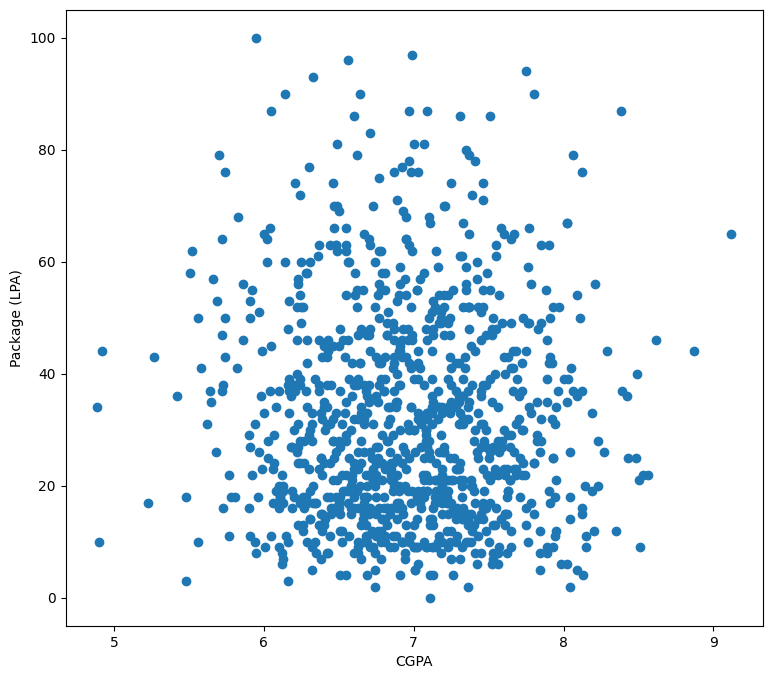

In [27]:
#Scatter ploting 
plt.figure(figsize=(9,8))
plt.scatter(df['cgpa'],df['placement_exam_marks'])
plt.xlabel('CGPA')
plt.ylabel('Package (LPA)')

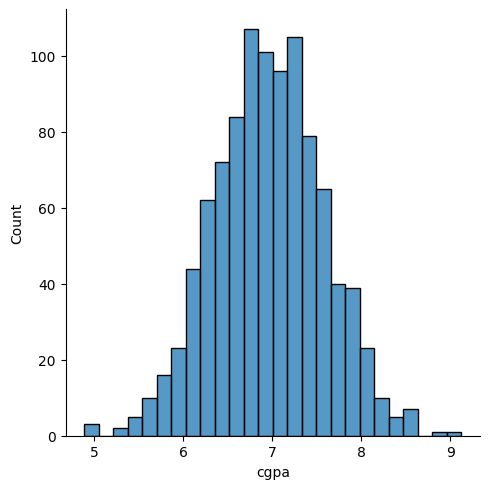

In [28]:
sns.displot(df['cgpa'])
plt.show()

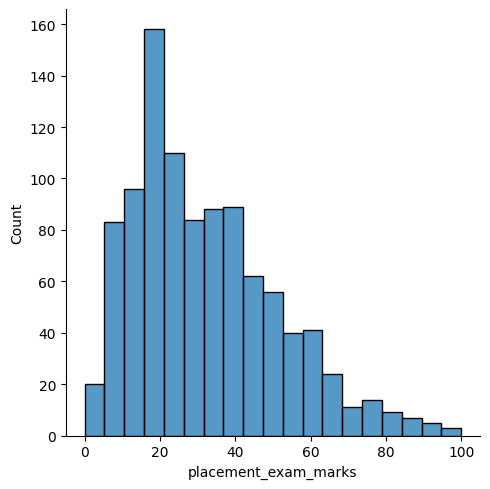

In [29]:
sns.displot(df['placement_exam_marks'])
plt.show()

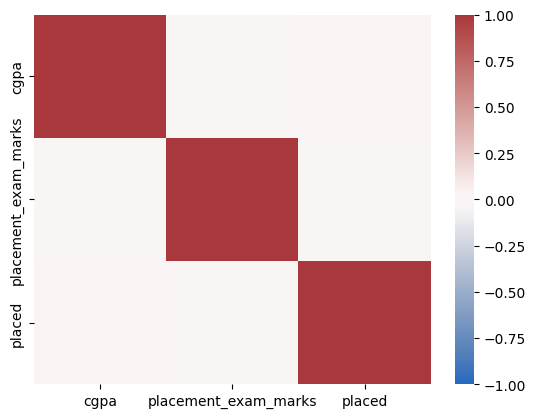

In [30]:
#Correlation
corr=df.corr()

sns.heatmap(corr, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

There's 0 correlation between all the features

Outlier detection 

In [50]:
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers

outliers_iqr = detect_outliers_iqr(df, 'placement_exam_marks')  # Replace with your target variable


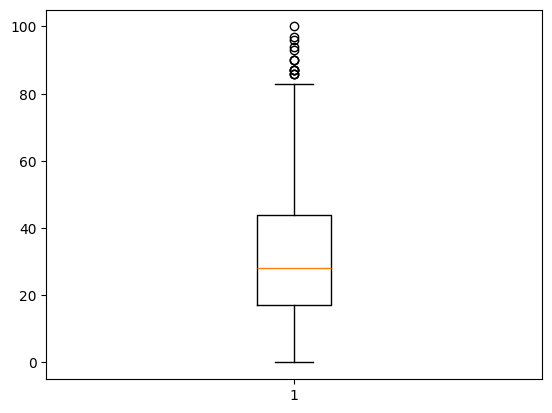

In [52]:
plt.boxplot(df["placement_exam_marks"])  # Visualize distribution and potential outliers
plt.show()


There are ouliers in our dataset so we will remove them

In [53]:
df_clean = df.drop(outliers_iqr.index)


In [55]:
df_clean.shape

(985, 3)

15 records of outliers have been removed

Modelling 

In [56]:
x = df_clean.iloc[:,0:1]
y = df_clean.iloc[:,1]

print(x.shape,y.shape)

(985, 1) (985,)


In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 10)

In [58]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(788, 1) (788,) (197, 1) (197,)


 Linear Regression Model 

In [59]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

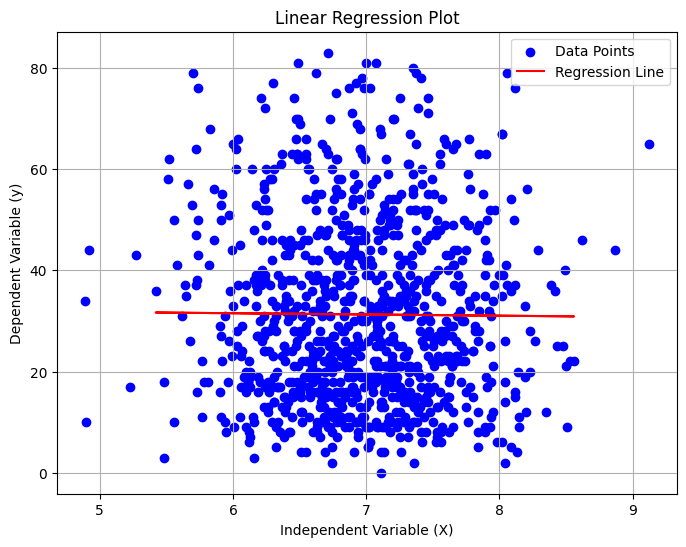

In [61]:

y_pred = lr.predict(x_test)  # get predictions for the plot points


plt.figure(figsize=(8, 6))  # adjust figure size as needed

# Plot the actual data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_test, y_pred, color='red', label='Regression Line')

# Add plot elements
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Plot')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [62]:
preds=lr.predict(x_test)

mae=mean_absolute_error(preds,y_test)
mse=mean_squared_error(preds,y_test)
rmse=mse**0.5
r2=r2_score(preds,y_test)


print('MAE=',mae)
print('MSE=',mse)
print('RMSE=',rmse)
print('R2=',r2)

MAE= 15.029372779635121
MSE= 344.6710123160432
RMSE= 18.565317457992556
R2= -16370.49335496957


That's pretty poor performance

SVM Regressor

In [63]:
from sklearn.svm import SVR

svr=SVR()

svr.fit(x_train,y_train)

SVR()

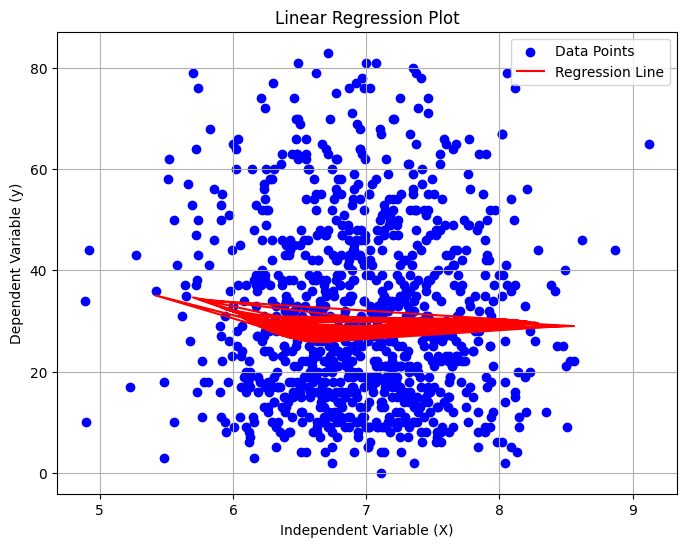

In [64]:

y_pred = svr.predict(x_test)  # get predictions for the plot points


plt.figure(figsize=(8, 6))  # adjust figure size as needed

# Plot the actual data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_test, y_pred, color='red', label='Regression Line')

# Add plot elements
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Plot')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [65]:
preds=svr.predict(x_test)

mae=mean_absolute_error(preds,y_test)
mse=mean_squared_error(preds,y_test)
rmse=mse**0.5
r2=r2_score(preds,y_test)


print('MAE=',mae)
print('MSE=',mse)
print('RMSE=',rmse)
print('R2=',r2)

MAE= 14.882068963730207
MSE= 363.6911001127921
RMSE= 19.070686933427233
R2= -122.52277855115103


Poor Performance again

SVM Linear Regressor

In [66]:
from sklearn.svm import LinearSVR

svml=LinearSVR()

svml.fit(x_train,y_train)


LinearSVR()

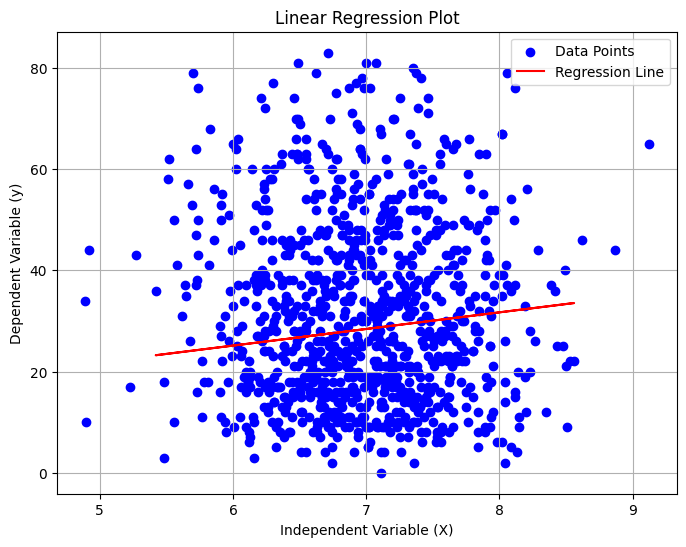

In [67]:
y_pred = svml.predict(x_test)  # get predictions for the plot points


plt.figure(figsize=(8, 6))  # adjust figure size as needed

# Plot the actual data points
plt.scatter(x, y, color='blue', label='Data Points')

# Plot the regression line
plt.plot(x_test, y_pred, color='red', label='Regression Line')

# Add plot elements
plt.xlabel('Independent Variable (X)')
plt.ylabel('Dependent Variable (y)')
plt.title('Linear Regression Plot')
plt.legend()
plt.grid(True)

# Display the plot
plt.show()

In [69]:
preds=svml.predict(x_test)

mae=mean_absolute_error(preds,y_test)
mse=mean_squared_error(preds,y_test)
rmse=mse**0.5
r2=r2_score(preds,y_test)


print('MAE=',mae)
print('MSE=',mse)
print('RMSE=',rmse)
print('R2=',r2)

MAE= 14.935846475277431
MSE= 365.0673487652883
RMSE= 19.106735690988355
R2= -93.35908046991106


Poor Performance 

RandomForest Regressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor(n_estimators=200,criterion='absolute_error',max_depth=5)

rfr.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=5, n_estimators=200)

In [76]:
preds=rfr.predict(x_test)

mae=mean_absolute_error(preds,y_test)
mse=mean_squared_error(preds,y_test)
rmse=mse**0.5
r2=r2_score(preds,y_test)


print('MAE=',mae)
print('MSE=',mse)
print('RMSE=',rmse)
print('R2=',r2)

MAE= 14.687284263959393
MSE= 352.05341167512694
RMSE= 18.763086411225817
R2= -47.75470720099783


XG Boost Regressor

In [77]:
from xgboost import XGBRegressor

xgb=XGBRegressor()

xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
preds=xgb.predict(x_test)

mae=mean_absolute_error(preds,y_test)
mse=mean_squared_error(preds,y_test)
rmse=mse**0.5
r2=r2_score(preds,y_test)


print('MAE=',mae)
print('MSE=',mse)
print('RMSE=',rmse)
print('R2=',r2)

MAE= 15.852410989364392
MSE= 414.5673243101167
RMSE= 20.360926410900774
R2= -2.838761476039334


Out of all model XG Boost Regressor has performed well so we will decide it as our final model 

The Dataset used is very small so the model performances aren't that much great 

The dataset can also be used for classification problem where whether the student will be Placed or not we will train that model later  